# ActivityRec - An App for Self-Care Recommendation
In this vignette the ActivityRec package will be explained.

**Author:** Fleur Korzilius
**Year:** 2023

## Content
- Introduction
- Basic usage
    - Activity_rec
    - Unit testing
    - App skeleton
- Dash app
    - Tab 1: activity recommender
    - Tab 2: user activity input
- Requirements

### Introduction
The ActivityRec package allows one to run a Dash app that recommends self-care activities based on user input on physical and mental energy, whether they want to leave their house and what the weather is like. This app is meant to make the process of self-care a little bit easier.

The package is divided into several modules:
- **activity_rec**: core function that turns user input into recommended activity
- **test_activity_rec**: unit testing on activity_rec function
- **app**: code of dash app layout and callbacks


### Basic usage

#### Activity_rec
**Note**: the database of activities is based on personal input. The [csv file](https://raw.githubusercontent.com/Programming-The-Next-Step-2023/activityRecommendation/main/activities.csv) can be found on Github.

In [9]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/Programming-The-Next-Step-2023/activityRecommendation/main/activities.csv"
df = pd.read_csv(url, sep=";", encoding="ISO-8859-1")

def activity_rec(n_clicks, physical, mental, leaving, rain, temperature, input_data):
        '''
            Function to extract activity that matches arguments
            :param n_clicks: to see whether user has filled in all information
            :param physical: user input about physical energy (range 1:5)
            :param mental: user input about mental energy (1:5)
            :param leaving: user input about whether they want to leave the house or stay in
            :param rain: user input about the weather conditions
            :param temperature: user input about the weather conditions
            :param input_data: datatable from tab 2
            :return: returns the activity that matches input
        '''
        if n_clicks is not None and n_clicks > 0:
            # everytime user clicks submit button, function starts running

            df_input = pd.DataFrame(input_data) # use dataframe from tab 2

            if rain == 'Rainy':
                location = 'Inside'
            elif temperature == 'Cold' and rain == 'Cloudy':
                location = 'Inside'
            else:
                location = 'Outside'
                # if weather is rainy or cold and cloudy activity is inside, otherwise activity is outside

            activity = 'Error: No activities match your state' # return statement if no activity in database is equal to input
            requirements = np.array([physical, mental, location, leaving], dtype=object) # input in array form

            # shuffle the rows of df_input to randomize the loop
            df_input = df_input.sample(frac=1).reset_index(drop=True)

            for index, row in df_input.iterrows():
                database = np.asarray(row[['Physical', 'Mental', 'Location', 'Leaving']])
                if np.array_equal(database, requirements):
                    activity = row['Activity']
                    #if requirements and the row that is being looped over are equal, then activity gets saved

            return f'{activity}'

The app file consists of several other functions that are necessary for the callbacks between and within tabs - *activity_modal*, *add_row*, *update_database*.

#### Unit testing

The package includes a unit test of the activity_rec function, since this function carries out the most important operation of the package (matching input with recommendation).

#### App skeleton
The app consists of two tabs, created with dcc.Tabs. The code of the layouts of the individual tabs is too long for the purposes of this vignette. To see the code, visit the [activityRecommendation GitHub](https://github.com/Programming-The-Next-Step-2023/activityRecommendation/tree/main). Below you can find the general Tab skeleton.

### Dash app
The app has two tabs, in which distinct actions can be performed. The first tab is the main activity recommender, whereas the second tab allows for own activity input.
#### Tab 1: activity recommender
The first tab recommends an activity based on user input.



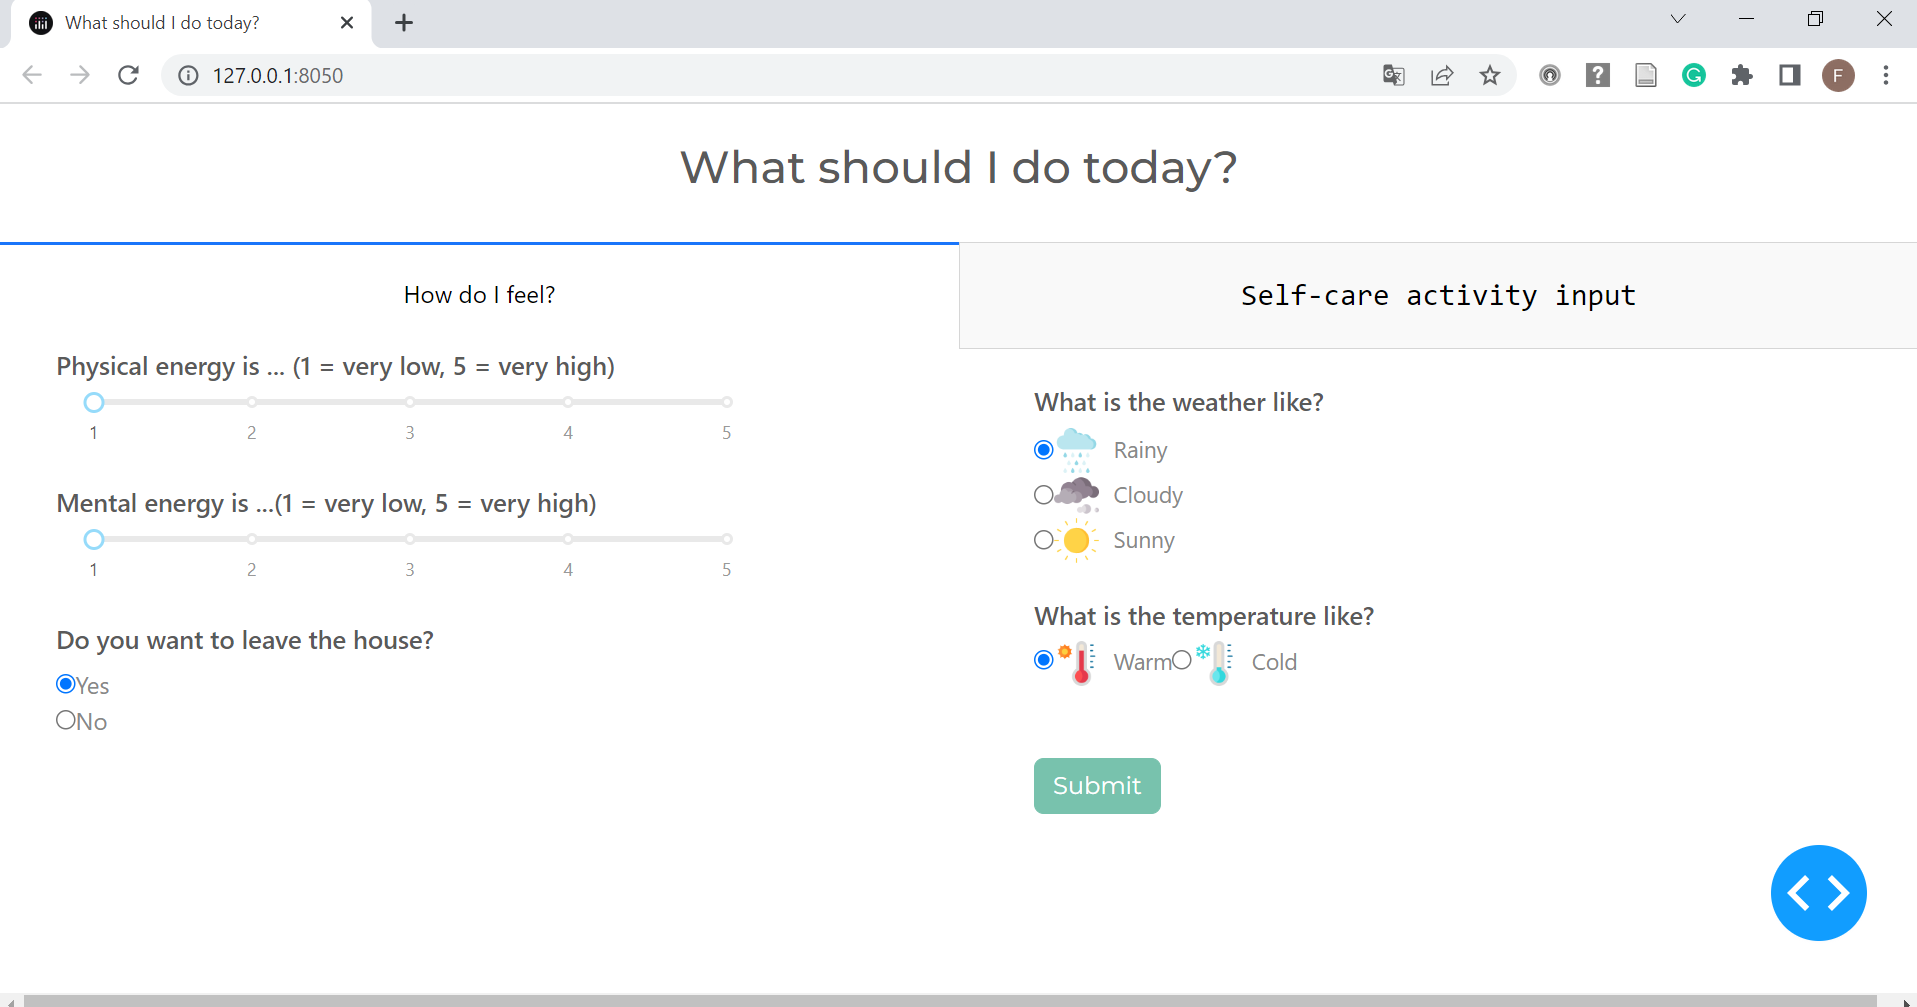

The user answers the five questions based on their situation, after which they click submit. Once the submit button is clicked, a pop-up window with the recommended activity appears.

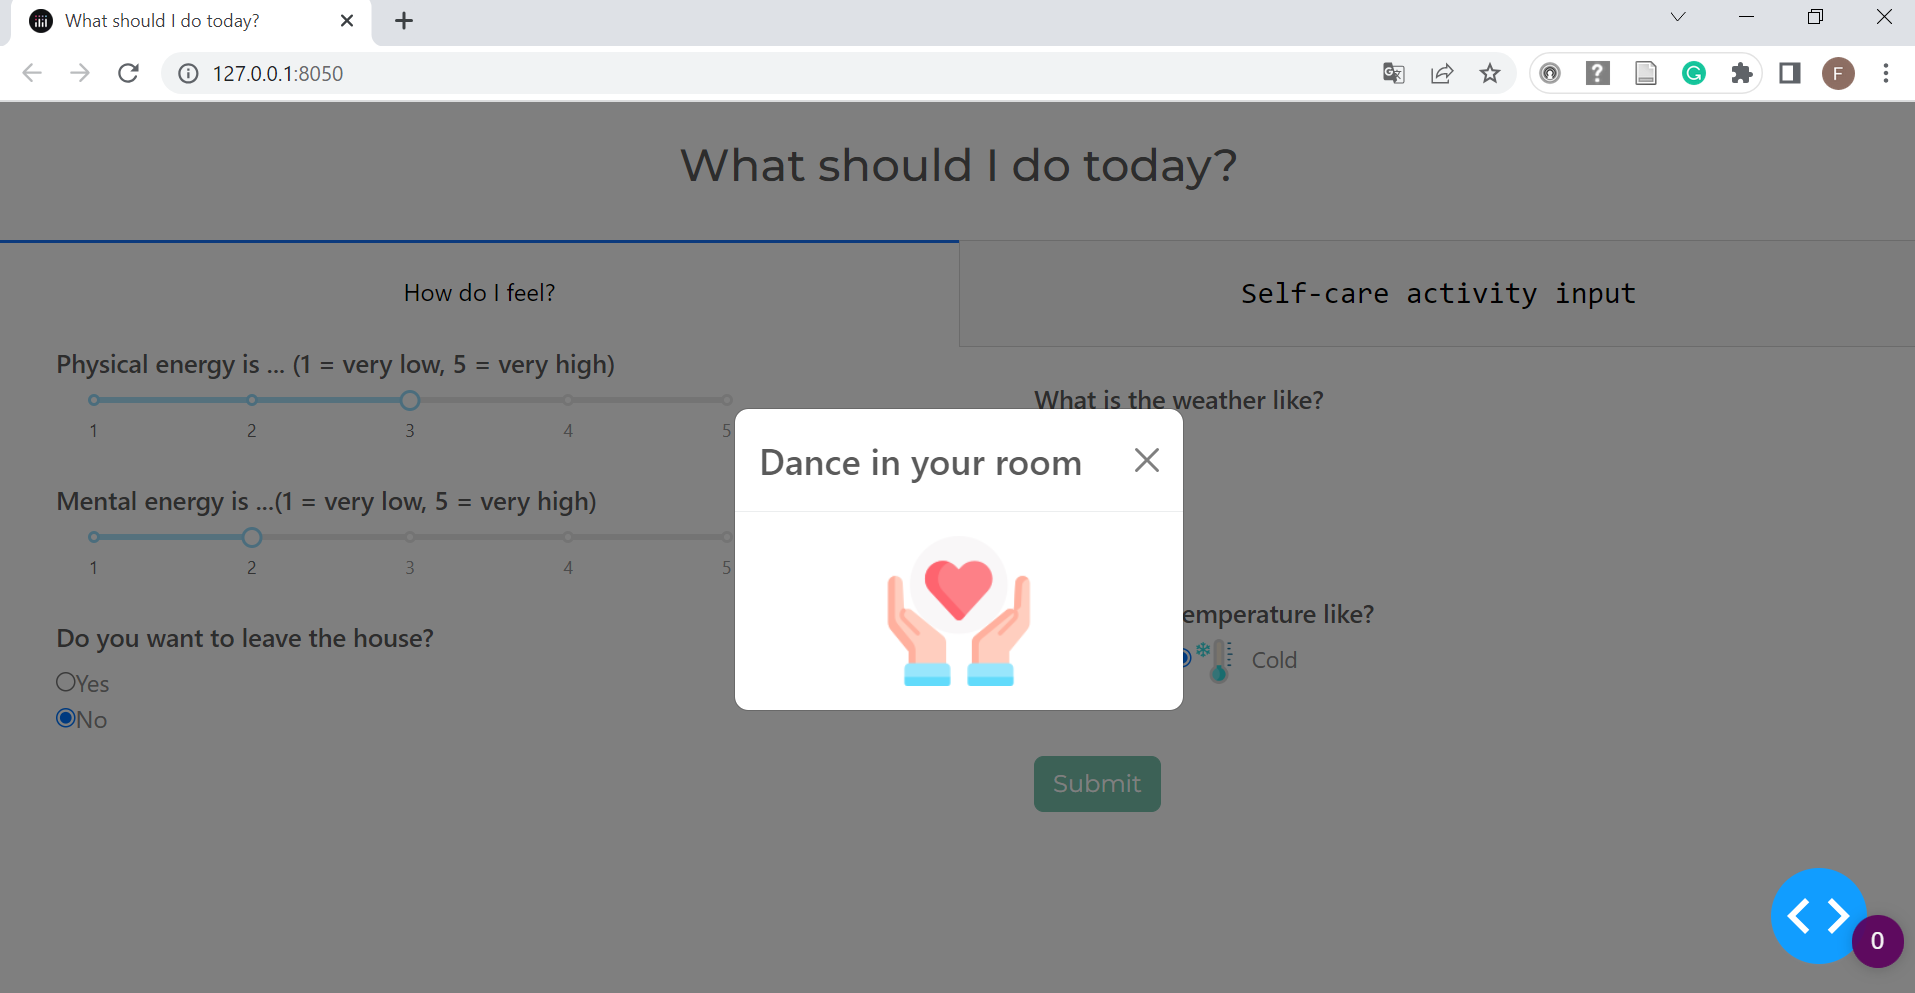

If the user input does not match any of the activities in the database, an error message gets presented.

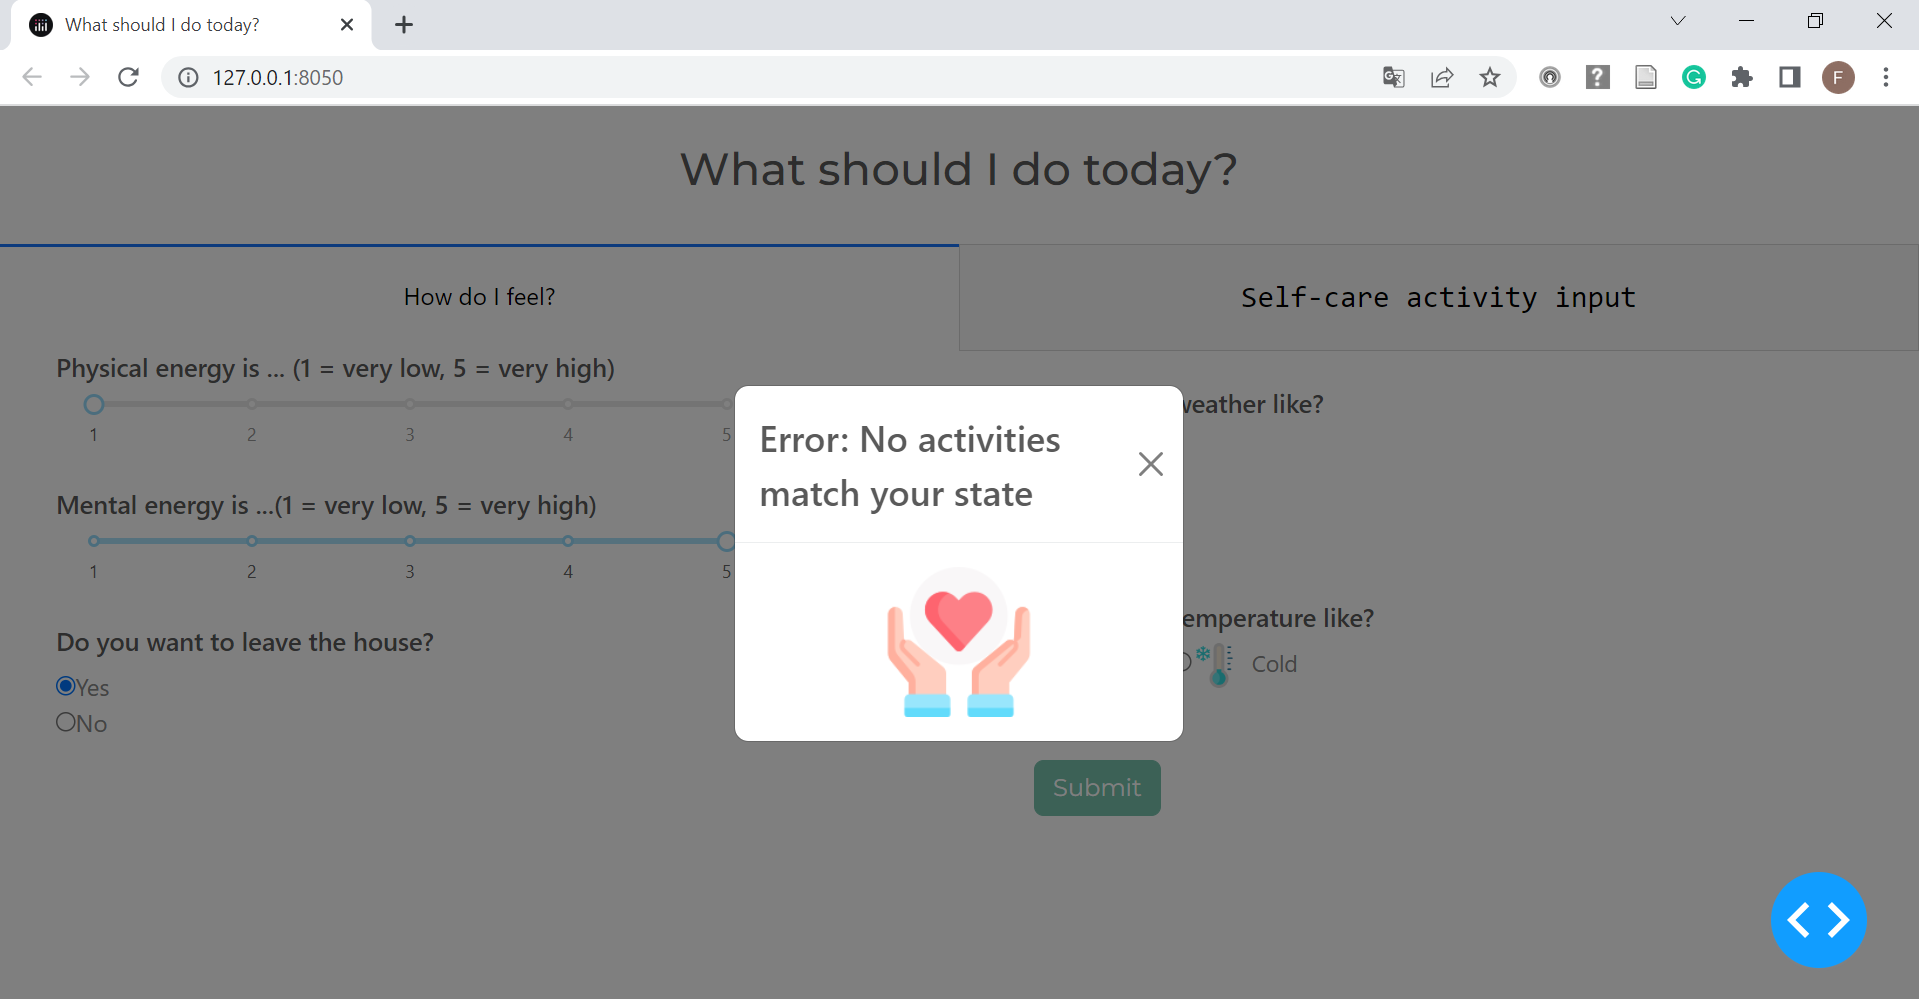

#### Tab 2: user activity input
The second tab allows users to edit the list of self-care activities that is used as the database in tab 1. The user can edit activity names, the energy inputs and location, as well as adding new activities and removing activities that do not suit them.

Initially, the default database is displayed on this tab.

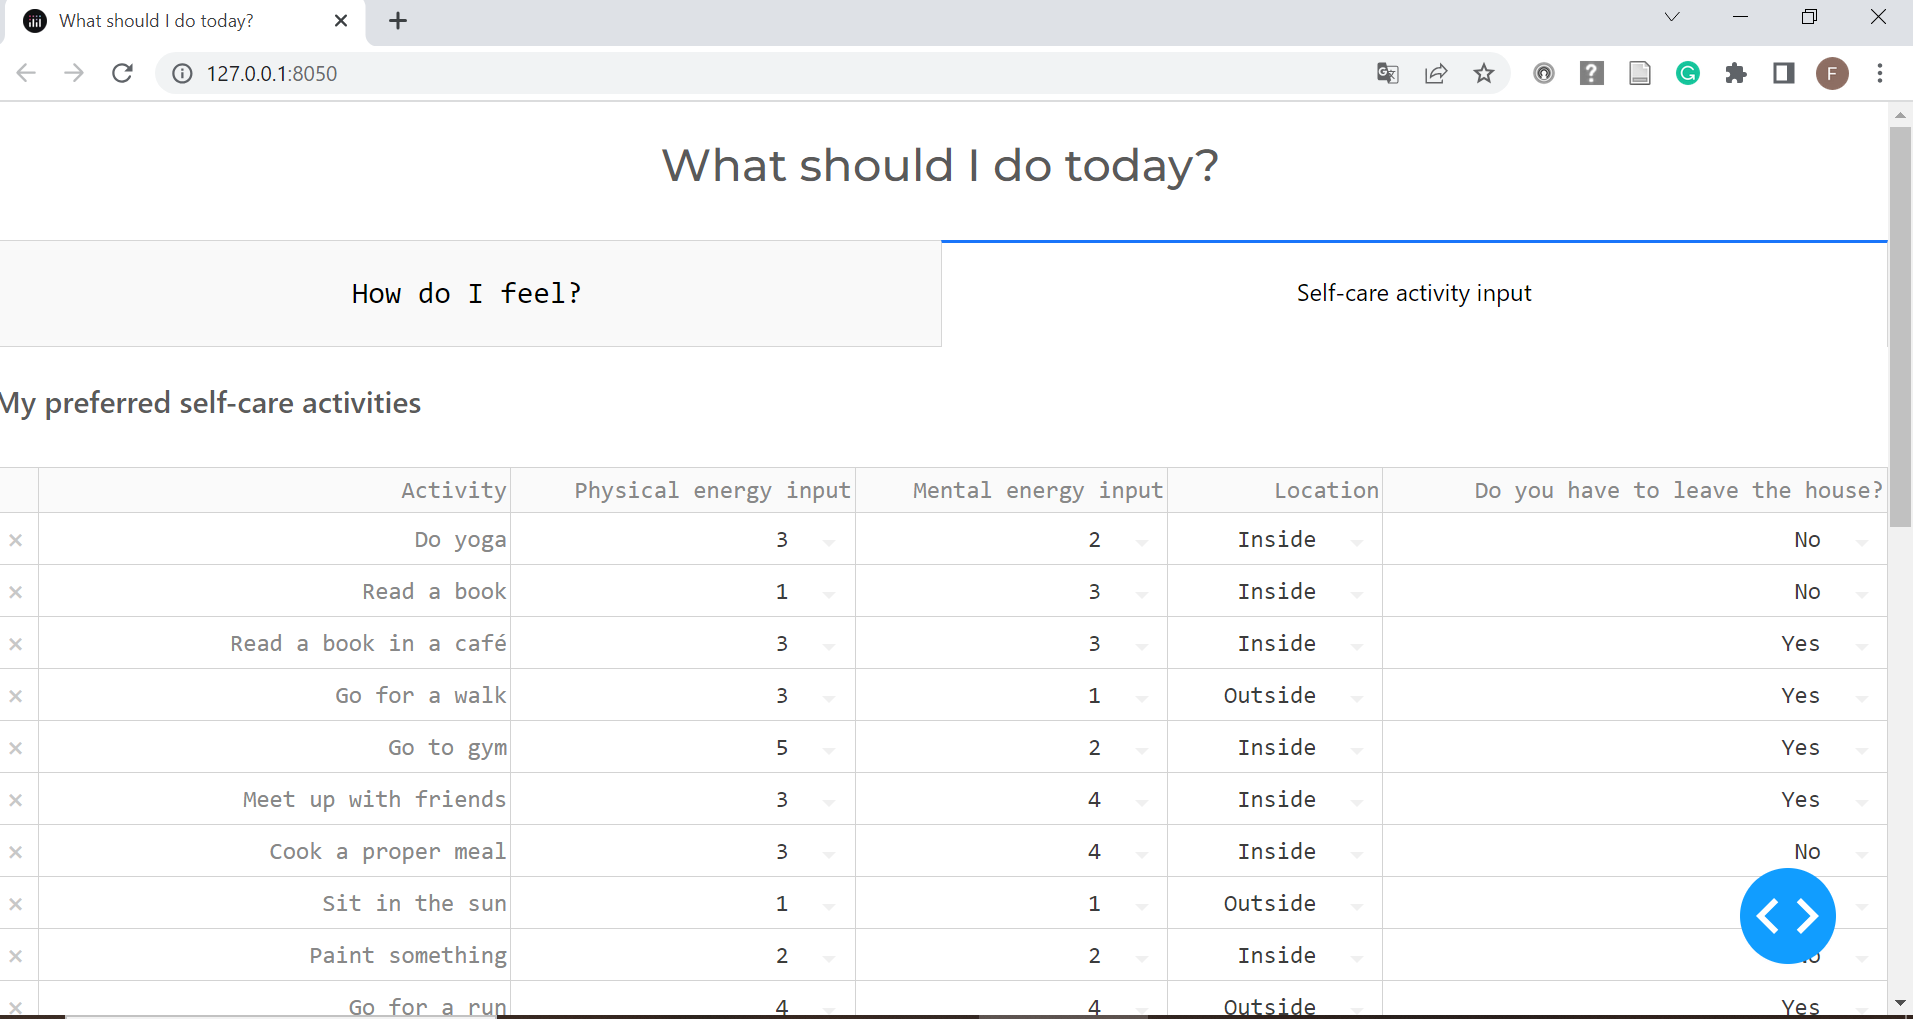

At the bottom of the page, users can add activities and save the edited datatable.

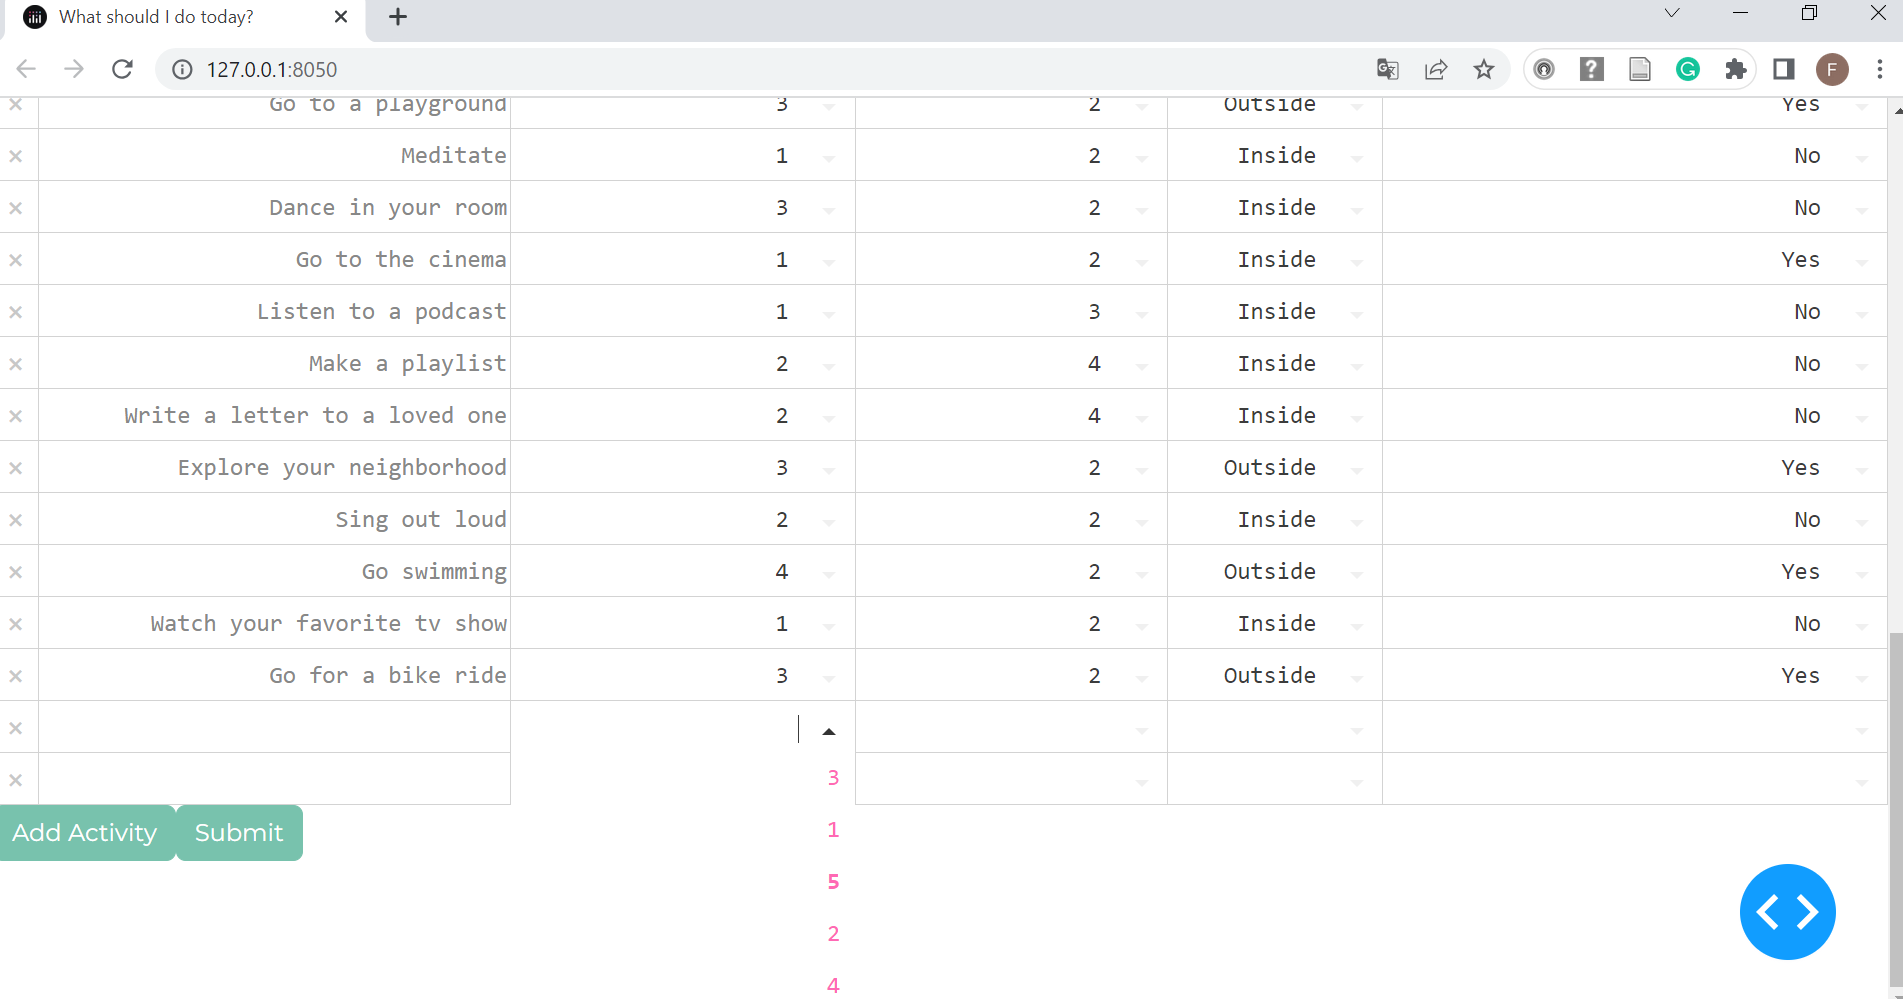

#### Requirements
The package requires the following packages:
dash, numpy, pandas, dash_bootstrap_components
